In [1]:
import os, sys
import re
import h5py
import corner
import numpy as np
import pandas as pd
import vallog as vl
import matplotlib.pyplot as plt


In [2]:
sys.path.append("../Util")
from create_test_yaml import create_yaml

msg = vl.Logger()

In [3]:
input_file: str = input("path/to/hdf5/file: ")
if input_file == "":
    input_file = "../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "hdf5" not in input_file:
    raise ValueError(f"File {input_file} is not a hdf5 file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        /home/valentin/mssmscanning/data/gambit-output/MSSM7-random-3-21425584/FS-MSSM7-random.hdf5


In [4]:
hdf5 = h5py.File(input_file, "r")['MSSM']
hdf5_df = pd.DataFrame({key: hdf5[key][:] for key in hdf5.keys()})
input_parameters = []
pattern = re.compile(r'#MSSM.*atQ_parameters @MSSM.*atQ::primary_parameters::(?!.*_isvalid).*$')
for key in hdf5.keys():
    print(key)
    match = pattern.search(key)
    if match:
        input_parameters.append(match.group())

labels = [string.split('::')[-1] for string in input_parameters]
parameter_df = hdf5_df[input_parameters]
parameter_df.columns = labels
parameter_df = parameter_df.loc[:, parameter_df.nunique() > 2]


mask = hdf5_df["LogLike_isvalid"] == 1
valid_models = parameter_df[mask]



msg.log(f"number of generated models: {hdf5_df.shape[0]}", vl.info)
msg.log(f"number of valid models: {valid_models.shape[0]}", vl.info)
valid_models


#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2_isvalid
#MSSM7atQ_parameters

,Ad_3,Au_3,M2,TanBeta,mHd2,mHu2,mf2
2,172.515133,-3665.408399,-16.520942,65.986569,1.962072e+06,-1.599377e+06,1.527247e+06
4,306.220057,-1451.296174,99.525569,48.796945,1.896860e+06,-5.084759e+05,8.497402e+05
7,2108.949027,260.096468,-659.591247,9.416065,1.880640e+06,-2.182018e+06,4.264854e+06
8,33.032493,-1194.116138,-149.355785,51.020054,2.274830e+06,-2.441591e+06,8.614837e+06
10,-432.852713,581.324317,-55.577229,6.860560,1.970998e+06,-2.444731e+06,4.741053e+04
...,...,...,...,...,...,...,...
9966,-288.511497,253.711176,165.148232,38.522890,5.563509e+04,-2.446449e+06,1.423690e+05
9989,1006.732443,44.588276,-95.759547,9.860017,1.091515e+06,-1.002930e+06,1.477015e+05
9991,94.288986,-72.255598,-277.538537,39.386654,2.552842e+06,-1.432904e+05,3.129819e+05
9996,75.877962,142.316169,-100.318852,4.558554,9.275642e+05,-2.794591e+04,1.762386e+05


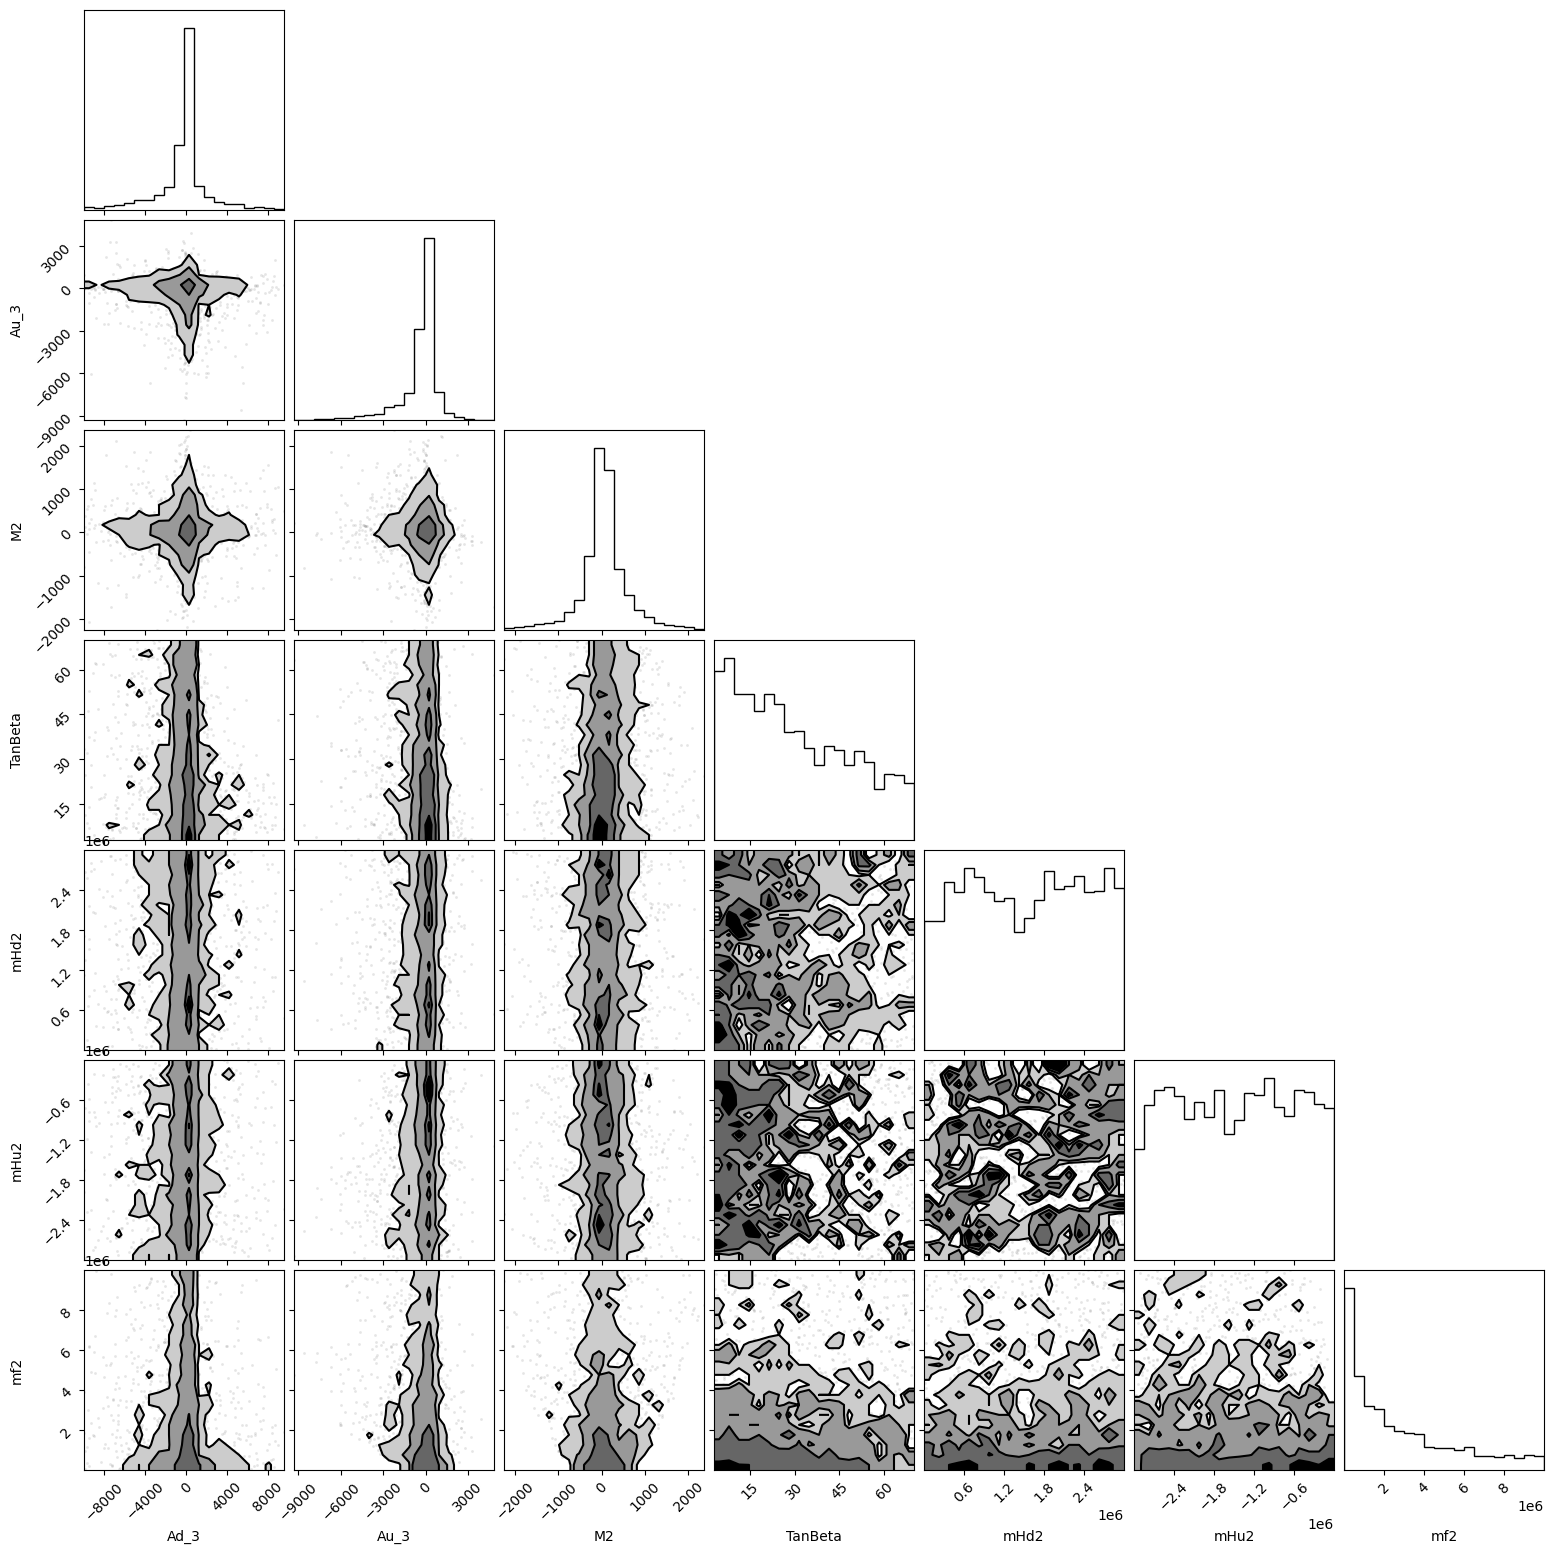

In [9]:
corner_fig = corner.corner(valid_models, labels=parameter_df.columns, fill_contours=True, plot_density=True)
corner_fig.savefig(f"plots/gambit-{input_file.split('/')[-1]}-spectrum-corner.png")

In [6]:
atlas_run2_ranges = {
    "Qin": 2000,
    "SignMu": 1,
    "TanBeta": [1,60],
    "mHu2": [-5000, 5000],
    "mHd2": [-5000, 5000],
    "M1": [-2000, 2000],
    "M2": [-2000, 2000],
    "M3": [1000, 5000],
    "mq2_12": 10000,
    "mq2_3": [2000, 5000],
    "ml2_12": 10000,
    "ml2_3": 10000,
    "md2_12": 10000,
    "md2_3": [2000, 5000],
    "mu2_12": 10000,
    "mu2_3": [2000, 5000],
    "Ae_3": [-2000, 2000],
    "Ad_3": [-2000, 2000],
    "Au_3": [-8000, 8000]
    }

In [7]:
minima = valid_models.min()
maxima = valid_models.max()
atlas_compatible_models = pd.DataFrame()
for parameter, range in atlas_run2_ranges.items():
    if parameter in valid_models.columns:
        atlas_compatible_models[parameter]  = valid_models[parameter].between(range[0], range[1])
boundary_table = pd.DataFrame({
    "Min": minima,
    "Max": maxima,
    #"inside ALTAS bounds": ,
})
boundary_table["inside ALTAS bounds"] = [atlas_compatible_models[parameter].sum() if parameter in atlas_compatible_models.columns else "NaN" for parameter in boundary_table.index]
boundary_table

,Min,Max,inside ALTAS bounds
Ad_3,-9.983145e+03,9.564116e+03,1571
Au_3,-9.306692e+03,4.842811e+03,2066
M2,-2.250750e+03,2.360767e+03,2055
TanBeta,3.001496e+00,6.994955e+01,1884
mHd2,7.224963e+02,2.998698e+06,1
mHu2,-2.997278e+06,-2.644498e+03,3
mf2,8.346645e+03,9.998110e+06,NaN
